<a href="https://colab.research.google.com/github/bendevishal/MachineLearning/blob/main/Lab5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
df=pd.read_csv('/content/train_and_test2.csv')

In [3]:
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
df.isnull().sum()

,0
Passengerid,0
Age,0
Fare,0
Sex,0
sibsp,0
zero,0
zero.1,0
zero.2,0
zero.3,0
zero.4,0


In [5]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()


,0
Passengerid,0
Age,0
Fare,0
Sex,0
sibsp,0
zero,0
zero.1,0
zero.2,0
zero.3,0
zero.4,0


In [6]:
x=df.drop('2urvived',axis=1)
y=df['2urvived']

In [7]:
y.shape

(1309,)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [13]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred=log_reg.predict(x_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[174,   7],
       [ 43,  38]])

In [16]:

from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8015267175572519
Confusion Matrix:
 [[174   7]
 [ 45  36]]


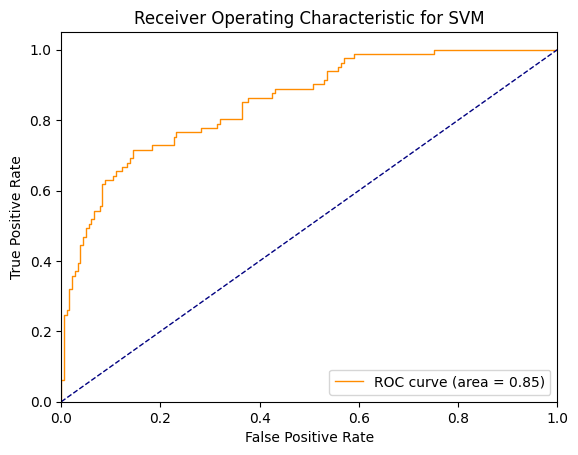

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import matplotlib.pyplot as plt


svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(x_train, y_train)

y_scores_svm = svm_classifier.predict_proba(x_test)[:, 1]

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()
